
<h1 align=center><font size = 5> <center>文本分析与挖掘</center> </font></h1> 

<h2 align=center><font size = 4><center>实验七、基于循环神经网络的情感分类</center></font></h2>
<h2 align=center><font size = 2><center>浙江工业大学计算机科学与技术学院</center></font></h2>

## 一、实验目的

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li>掌握基于进行分类的模型搭建和训练</li>
<li>掌握不同 RNN 类型的调用</li>
<li> 熟悉英文情感分类过程</li>

## 二、实验内容
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li>基于循环神经网络对英文影评 IMDB 数据集进行分类。</li>



加载IMDB数据集，并划分训练集和测试集

In [1]:
import  os
import  tensorflow as tf
import  numpy as np
from    tensorflow import keras
from    tensorflow.keras import layers, losses, optimizers, Sequential
import pandas  as pd
import matplotlib.pyplot as plt

In [2]:
max_review_len = 80 # 句子最大长度s，大于的句子部分将截断，小于的将填充
max_word_num=60#词汇表数量
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_word_num)
#打印输入的形状，标签的形状
print("训练集的形状:", x_train.shape)
print("测试集的形状:",x_test.shape)

训练集的形状: (25000,)
测试集的形状: (25000,)


In [3]:
# 截断和填充句子，使得等长，此处长句子保留句子后面的部分，短句子在前面填充
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)


In [4]:
x_train=x_train.tolist()
x_test=x_test.tolist()

In [5]:
for i in range(len(x_train)):
    x_train[i]=tf.one_hot(x_train[i],max_word_num)
for i in range(len(x_test)):
    x_test[i]=tf.one_hot(x_test[i],max_word_num)

### 1.单层GRU

#### a) 模型 1：单层 GRU（节点个数 128，激活 tanh），全连接（1个节点,激活 sigmoid）。

In [7]:

model=keras.models.Sequential(
[

keras.layers.GRU(128,input_shape=(max_review_len,max_word_num),activation="tanh"),
keras.layers.Dense(1,activation="sigmoid")
])7

model.compile(optimizer = optimizers.RMSprop(0.001),
                  loss = losses.BinaryCrossentropy(),
                  metrics=['accuracy'])


#### b) 设置 batchsize=32, 训练模型 1，得到测试集上的准确。

In [6]:
batchsz = 32 # 批量大小
# 构建数据集，打散，批量，并丢掉最后一个不够batchsz的batch
db_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db_train = db_train.shuffle(1000).batch(batchsz, drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.batch(batchsz, drop_remainder=True)


In [8]:
history=model.fit(db_train,epochs=10)

Epoch 1/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6723 - accuracy: 0.5839
Epoch 2/10
781/781 [==============================] - 3s 4ms/step - loss: 0.6481 - accuracy: 0.6254
Epoch 3/10
781/781 [==============================] - 3s 4ms/step - loss: 0.6394 - accuracy: 0.6331
Epoch 4/10
781/781 [==============================] - 3s 4ms/step - loss: 0.6304 - accuracy: 0.6413
Epoch 5/10
781/781 [==============================] - 4s 4ms/step - loss: 0.6215 - accuracy: 0.6497
Epoch 6/10
781/781 [==============================] - 4s 4ms/step - loss: 0.6142 - accuracy: 0.6578
Epoch 7/10
781/781 [==============================] - 3s 4ms/step - loss: 0.6064 - accuracy: 0.6663
Epoch 8/10
781/781 [==============================] - 4s 5ms/step - loss: 0.5997 - accuracy: 0.6734
Epoch 9/10
781/781 [==============================] - 4s 5ms/step - loss: 0.5913 - accuracy: 0.6808
Epoch 10/10
781/781 [==============================] - 4s 5ms/step - loss: 0.5834 - accuracy: 0.6890

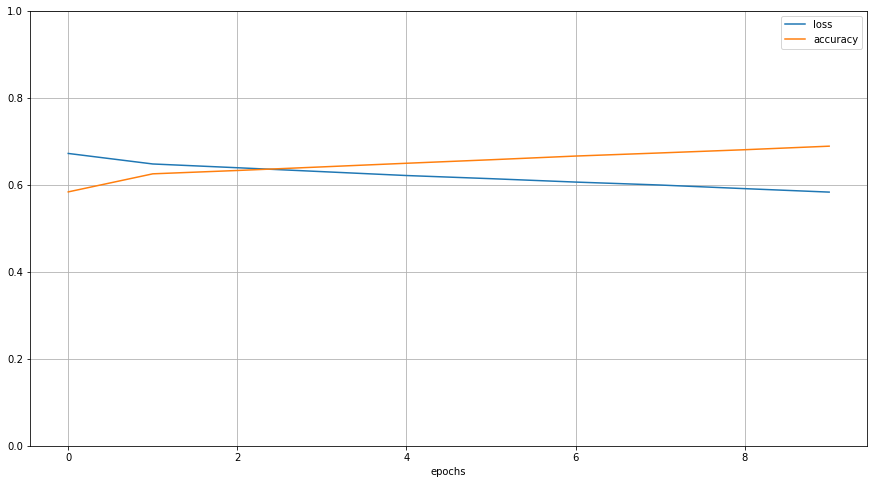

In [14]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel("epochs")
plt.show()

In [15]:
model.evaluate(db_test)

781/781 [==============================] - 2s 2ms/step - loss: 0.6158 - accuracy: 0.6667


[0.6158457398414612, 0.6666933298110962]

### 2.单层LSTM
模型 2：把模型 1 中的 GRU 改成 LSTM，重复 1（b）实验，对比
结果。

In [16]:
model=keras.models.Sequential(
[

keras.layers.LSTM(128,input_shape=(max_review_len,max_word_num),activation="tanh"),
keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer = optimizers.RMSprop(0.001),
                  loss = losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
history=model.fit(db_train,epochs=10)

Epoch 1/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6660 - accuracy: 0.5968
Epoch 2/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6460 - accuracy: 0.6283
Epoch 3/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6411 - accuracy: 0.6337
Epoch 4/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6386 - accuracy: 0.6370
Epoch 5/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6344 - accuracy: 0.6408
Epoch 6/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6285 - accuracy: 0.6450
Epoch 7/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6238 - accuracy: 0.6475
Epoch 8/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6156 - accuracy: 0.6579
Epoch 9/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6105 - accuracy: 0.6617
Epoch 10/10
781/781 [==============================] - 4s 5ms/step - loss: 0.6017 - accuracy: 0.6696

In [17]:
model.evaluate(db_test)

781/781 [==============================] - 2s 3ms/step - loss: 0.6308 - accuracy: 0.6510


[0.6308274269104004, 0.6509683132171631]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
准确率虽比单层GRU低，但总体性能类似。

### 3. 双层 GRU
模型 3：双层 GRU(每层节点个数 128，激活 tanh)，全连接（1
个节点,激活 sigmoid）。重复 1（b）实验，对比结果。

In [19]:
model=keras.models.Sequential(
[

keras.layers.GRU(128,input_shape=(max_review_len,max_word_num),activation="tanh",return_sequences=True),
keras.layers.GRU(128,activation="tanh"),    
keras.layers.Dense(1,activation="sigmoid")
])



In [20]:
model.compile(optimizer = optimizers.RMSprop(0.001),
                  loss = losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
history=model.fit(db_train,epochs=10)

Epoch 1/10
781/781 [==============================] - 7s 8ms/step - loss: 0.6729 - accuracy: 0.5880
Epoch 2/10
781/781 [==============================] - 6s 8ms/step - loss: 0.6488 - accuracy: 0.6236
Epoch 3/10
781/781 [==============================] - 6s 8ms/step - loss: 0.6394 - accuracy: 0.6360
Epoch 4/10
781/781 [==============================] - 6s 8ms/step - loss: 0.6288 - accuracy: 0.6443
Epoch 5/10
781/781 [==============================] - 6s 8ms/step - loss: 0.6187 - accuracy: 0.6544
Epoch 6/10
781/781 [==============================] - 6s 8ms/step - loss: 0.6112 - accuracy: 0.6624
Epoch 7/10
781/781 [==============================] - 6s 8ms/step - loss: 0.6017 - accuracy: 0.6690
Epoch 8/10
781/781 [==============================] - 7s 8ms/step - loss: 0.5950 - accuracy: 0.6773
Epoch 9/10
781/781 [==============================] - 7s 8ms/step - loss: 0.5836 - accuracy: 0.6859
Epoch 10/10
781/781 [==============================] - 7s 8ms/step - loss: 0.5716 - accuracy: 0.6969

In [21]:
model.evaluate(db_test)

781/781 [==============================] - 3s 4ms/step - loss: 0.6113 - accuracy: 0.6660


[0.6113374829292297, 0.6659731268882751]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
使用双层GRU与单层GRU相比，在训练集上准确率上提升了0.01，在测试集上反而略微下降，两个模型的性能基本差不多，且预测的精度都不是很高。
    
我推测，由于内存的限制，只能将词汇表限制在60，丢失了大量的特征，所以单层与双层GRU效果类似。

### 4.分别设置 batchsize=16 和 64，重复 1（b）实验，对比结果。

#### （a）batchsize=16

In [6]:
batchsz = 16 # 批量大小
# 构建数据集，打散，批量，并丢掉最后一个不够batchsz的batch
db_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db_train = db_train.shuffle(1000).batch(batchsz, drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.batch(batchsz, drop_remainder=True)

In [7]:
model=keras.models.Sequential(
[

keras.layers.GRU(128,input_shape=(max_review_len,max_word_num),activation="tanh"),
keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer = optimizers.RMSprop(0.001),
                  loss = losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

In [8]:
model.fit(db_train,epochs=10)

Epoch 1/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.6698 - accuracy: 0.5926
Epoch 2/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.6451 - accuracy: 0.6313
Epoch 3/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.6338 - accuracy: 0.6384
Epoch 4/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.6233 - accuracy: 0.6500
Epoch 5/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.6133 - accuracy: 0.6589
Epoch 6/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.6030 - accuracy: 0.6684
Epoch 7/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.5921 - accuracy: 0.6807
Epoch 8/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.5806 - accuracy: 0.6876
Epoch 9/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.5663 - accuracy: 0.6991
Epoch 10/10
1562/1562 [==============================] - 6s 4ms/step - loss: 0.551

In [9]:
model.evaluate(db_test)

1562/1562 [==============================] - 3s 2ms/step - loss: 0.6346 - accuracy: 0.6709


[0.6346493363380432, 0.6709346771240234]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
    
缩小batchsize后，可以发现每个轮次的训练次数增加了，模型的性能有略微的提升

#### （b）batchsize=64

In [6]:
batchsz = 64 # 批量大小
# 构建数据集，打散，批量，并丢掉最后一个不够batchsz的batch
db_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db_train = db_train.shuffle(1000).batch(batchsz, drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.batch(batchsz, drop_remainder=True)

In [7]:
model=keras.models.Sequential(
[

keras.layers.GRU(128,input_shape=(max_review_len,max_word_num),activation="tanh"),
keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer = optimizers.RMSprop(0.001),
                  loss = losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
model.fit(db_train,epochs=10)

Epoch 1/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6755 - accuracy: 0.5765
Epoch 2/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6488 - accuracy: 0.6257
Epoch 3/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6428 - accuracy: 0.6303
Epoch 4/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6375 - accuracy: 0.6385
Epoch 5/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6299 - accuracy: 0.6404
Epoch 6/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6258 - accuracy: 0.6481
Epoch 7/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6191 - accuracy: 0.6538
Epoch 8/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6131 - accuracy: 0.6593
Epoch 9/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6062 - accuracy: 0.6672
Epoch 10/10
390/390 [==============================] - 3s 7ms/step - loss: 0.6016 - accuracy: 0.6704

In [8]:
model.evaluate(db_test)

390/390 [==============================] - 1s 4ms/step - loss: 0.6134 - accuracy: 0.6619


[0.613368570804596, 0.6618990302085876]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
增大bitchsize后，每一轮训练次数变少了，训练的时间也降低了，但准确率提升不是很高。

### 5. 模型 4：embedding 层（128 个节点），单层 GRU（节点个数 128，激活 tanh），全连接（1 个节点,激活 sigmoid）。重复 1（b）实验，对比结果，讨论降维的作用。

In [9]:
max_review_len = 120 # 句子最大长度s，大于的句子部分将截断，小于的将填充
max_word_num=10000#词汇表数量

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_word_num)
# 截断和填充句子，使得等长，此处长句子保留句子后面的部分，短句子在前面填充
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

batchsz = 128 # 批量大小
# 构建数据集，打散，批量，并丢掉最后一个不够batchsz的batch
db_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db_train = db_train.shuffle(1000).batch(batchsz, drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.batch(batchsz, drop_remainder=True)

In [11]:
model=keras.models.Sequential(
[
keras.layers.Embedding(max_word_num,128,input_length=max_review_len),
keras.layers.GRU(128,activation="tanh"),
keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer = optimizers.RMSprop(0.001),
                  loss = losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
model.fit(db_train,epochs=10)

Epoch 1/10
195/195 [==============================] - 5s 24ms/step - loss: 0.4968 - accuracy: 0.7690
Epoch 2/10
195/195 [==============================] - 5s 24ms/step - loss: 0.3121 - accuracy: 0.8685
Epoch 3/10
195/195 [==============================] - 5s 24ms/step - loss: 0.2575 - accuracy: 0.8966
Epoch 4/10
195/195 [==============================] - 5s 24ms/step - loss: 0.2173 - accuracy: 0.9156
Epoch 5/10
195/195 [==============================] - 5s 24ms/step - loss: 0.1831 - accuracy: 0.9312
Epoch 6/10
195/195 [==============================] - 5s 25ms/step - loss: 0.1505 - accuracy: 0.9447
Epoch 7/10
195/195 [==============================] - 5s 24ms/step - loss: 0.1167 - accuracy: 0.9582
Epoch 8/10
195/195 [==============================] - 5s 24ms/step - loss: 0.0890 - accuracy: 0.9693
Epoch 9/10
195/195 [==============================] - 5s 24ms/step - loss: 0.0680 - accuracy: 0.9778
Epoch 10/10
195/195 [==============================] - 5s 24ms/step - loss: 0.0520 - accura

In [12]:
model.evaluate(db_test)

195/195 [==============================] - 1s 8ms/step - loss: 0.6117 - accuracy: 0.8328


[0.6116817593574524, 0.832772433757782]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
加入embedding 层后，进行了降维，词汇表的数量和句子的长度都能扩大，信息丢失的少。
    
测试的准确率也远远超过了模型1。
    
但训练集的准确率很高，存在过拟合现象。

### 6. 尝试其他调参：学习率、优化器等，观察并讨论结果。

In [20]:
model=keras.models.Sequential(
[
keras.layers.Embedding(max_word_num,128,input_length=max_review_len),
keras.layers.GRU(128,activation="tanh",return_sequences=True, dropout=0.5),
keras.layers.GRU(128,activation="tanh", dropout=0.5),
keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer = optimizers.RMSprop(0.001),
                  loss = losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
model.fit(db_train,epochs=10)

Epoch 1/10
195/195 [==============================] - 8s 40ms/step - loss: 0.5165 - accuracy: 0.7375
Epoch 2/10
195/195 [==============================] - 8s 40ms/step - loss: 0.3369 - accuracy: 0.8591
Epoch 3/10
195/195 [==============================] - 8s 40ms/step - loss: 0.2806 - accuracy: 0.8873
Epoch 4/10
195/195 [==============================] - 8s 40ms/step - loss: 0.2495 - accuracy: 0.9013
Epoch 5/10
195/195 [==============================] - 8s 40ms/step - loss: 0.2189 - accuracy: 0.9149
Epoch 6/10
195/195 [==============================] - 8s 40ms/step - loss: 0.1943 - accuracy: 0.9261
Epoch 7/10
195/195 [==============================] - 8s 40ms/step - loss: 0.1725 - accuracy: 0.9354
Epoch 8/10
195/195 [==============================] - 8s 40ms/step - loss: 0.1539 - accuracy: 0.9439
Epoch 9/10
195/195 [==============================] - 8s 40ms/step - loss: 0.1358 - accuracy: 0.9504
Epoch 10/10
195/195 [==============================] - 8s 40ms/step - loss: 0.1209 - accura

In [21]:
model.evaluate(db_test)

195/195 [==============================] - 2s 13ms/step - loss: 0.3799 - accuracy: 0.8568


[0.3798908293247223, 0.8568108677864075]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
在加入一层GRU，并且设置dropout=0.5后，测试集准确率提高了2个百分点。

### 7.尝试用预训练词嵌入作为模型 1 的输入，对比模型 4 的结果。

In [4]:
max_review_len = 120 # 句子最大长度s，大于的句子部分将截断，小于的将填充
max_word_num=10000#词汇表数量

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_word_num)
# 截断和填充句子，使得等长，此处长句子保留句子后面的部分，短句子在前面填充
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

batchsz = 128 # 批量大小
# 构建数据集，打散，批量，并丢掉最后一个不够batchsz的batch
db_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db_train = db_train.shuffle(1000).batch(batchsz, drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.batch(batchsz, drop_remainder=True)


In [9]:
word_index = keras.datasets.imdb.get_word_index()
embeddings_index = {}
GLOVE_DIR = r'.\glove.6B'
with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'),encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))
MAX_NUM_WORDS = max_word_num
# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index))
embedding_matrix = np.zeros((num_words, 100))
applied_vec_count = 0
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    # print(word,embedding_vector)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        applied_vec_count += 1
print("所用词向量数量及词向量矩阵形状：",applied_vec_count, embedding_matrix.shape)

Found 400000 word vectors.
所用词向量数量及词向量矩阵形状： 9796 (10000, 100)


In [28]:
model=keras.models.Sequential(
[
keras.layers.Embedding(max_word_num,100,input_length=max_review_len,trainable=True,weights=[embedding_matrix]),
keras.layers.GRU(128,activation="tanh",dropout=0.5),
keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer = optimizers.Adam(0.002),
                  loss = losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
model.fit(db_train,epochs=10)

Epoch 1/10
195/195 [==============================] - 5s 24ms/step - loss: 0.6635 - accuracy: 0.5840
Epoch 2/10
195/195 [==============================] - 5s 24ms/step - loss: 0.4028 - accuracy: 0.8125
Epoch 3/10
195/195 [==============================] - 5s 24ms/step - loss: 0.2875 - accuracy: 0.8800
Epoch 4/10
195/195 [==============================] - 5s 25ms/step - loss: 0.2407 - accuracy: 0.9007
Epoch 5/10
195/195 [==============================] - 5s 25ms/step - loss: 0.2055 - accuracy: 0.9166
Epoch 6/10
195/195 [==============================] - 5s 26ms/step - loss: 0.1809 - accuracy: 0.9281
Epoch 7/10
195/195 [==============================] - 5s 25ms/step - loss: 0.1589 - accuracy: 0.9383
Epoch 8/10
195/195 [==============================] - 5s 25ms/step - loss: 0.1431 - accuracy: 0.9448
Epoch 9/10
195/195 [==============================] - 5s 25ms/step - loss: 0.1268 - accuracy: 0.9507
Epoch 10/10
195/195 [==============================] - 5s 25ms/step - loss: 0.1121 - accura

In [29]:
model.evaluate(db_test)

195/195 [==============================] - 1s 7ms/step - loss: 0.4184 - accuracy: 0.8628


[0.41843679547309875, 0.8627804517745972]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
    
使用预训练的词向量加载Embedding层，可以发现训练的初期，在第3个epoch左右时，模型的准确率就已经很高了。
    
最终测试集的准确率也相比模型4提升了3个百分点。